# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position       Team  GF  GA Points
count         4          4   4   4      4
unique        4          4   3   4      4
top           4  Feyenoord  75  25     66
freq          1          1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
# get to know the data
gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

print(gene_expression.shape)
pp = gene_expression.iloc[0:2,:]
print(pp)
print('\n')
print(drug_response.values.T)

print('\n')
print(drug_response.shape)
print(drug_response.iloc[0:4])

(148, 238)
            TFPI    TFAP2B      MGST1     PRSS3      ISL1     SNAI2  SERPINB1  \
949176  7.166555  2.795512   7.917741  9.466787  8.436305  9.500610  7.380575   
749714  9.084584  2.693997  12.199084  2.975566  3.479229  8.489317  8.500992   

              VIM      CD44      VCAN  ...     PSMB8     HSPA1A  SERPINB5  \
949176  13.073855  3.374265  9.332068  ...  4.338325   3.193308   3.23194   
749714   5.631460  7.950032  2.845233  ...  9.492377  11.628330   7.90218   

           MLLT11  AKR1B10P1       UCA1   MIR205HG     PHGR1      HLA-B  \
949176  10.828382   2.977182   3.694196   3.056695  2.714666   5.156024   
749714   3.568167   7.806236  12.332383  11.264508  3.405150  11.842518   

           SEPP1  
949176  9.426053  
749714  6.269068  

[2 rows x 238 columns]


[[ 0.42 -4.31 -4.8  -0.88  1.82 -1.47 -4.96 -5.94 -3.08 -4.02 -2.71 -3.66
   2.36 -5.53 -5.38 -4.49 -4.26 -5.7   0.19 -2.55  0.33 -4.89 -5.67 -3.23
  -5.61  2.15 -0.92  3.25 -5.51 -3.42  0.61 -5.82 -1.46 

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 




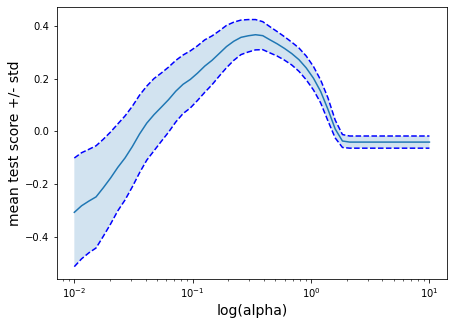

Best parameter:  {'alpha': 0.3393221771895328}


In [20]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# get values of de pandas Dataframes
X = gene_expression.values
y = drug_response.values

# split data in train and test set
# random state ensures that the split is reproducible, so each time you run the train and test set will be the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# standardize X values
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)

# define parameters for Lasso regression
lasso = Lasso(random_state = 0, max_iter = 10000)
alphas = np.logspace(-2,1,50)
tuned_parameters = [{'alpha':alphas}]
n_folds = 5

# perform gridsearch on all parameters alpha and fit model
grid = GridSearchCV(lasso,tuned_parameters, cv = n_folds)
grid.fit(X_train_s,y_train)

# get mean test score and standard deviation on all samples
scores = grid.cv_results_['mean_test_score']    
scores_std = grid.cv_results_['std_test_score']

# plot results
plt.figure().set_size_inches(7, 5)
plt.semilogx(alphas, scores) # plot mean test score for all alphas 

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.ylabel('mean test score +/- std',fontsize=14)
plt.xlabel('log(alpha)',fontsize=14)

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.show()

print("Best parameter: ", grid.best_params_)

# refitting on the best parameter alpha
best_model = grid.best_estimator_
y_pred = best_model.fit(X_train_s,y_train).predict(X_test) # perform fitting and predicting in one step

## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.


In [21]:
# fit model with best found value for alpha, so with minimum cross-validation error
yr_train = np.ravel(y_train)
clf = Lasso(alpha = list(grid.best_params_.values())).fit(X_train_s, yr_train)

# the features with the highest coef_ are most important
importance = np.abs(clf.coef_)

# get the indices of nr_imp most important features
nr_imp = 5
imp_index = (-importance).argsort() # sort at descending importance, so the first ones have the highest importance
i_most_imp_features = imp_index[:nr_imp]

# get all feature names
feature_names = gene_expression.columns
# print feature names of nr_imp features
most_imp_features = np.array(feature_names[i_most_imp_features])
print('The most relevant features for alpha with the minimum cross-validation error, are: {}'.format(most_imp_features))

The most relevant features for alpha with the minimum cross-validation error, are: ['ABCB1' 'TSPAN8' 'FBP1' 'AGR3' 'FABP1']


<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

In [22]:
from sklearn.model_selection import KFold

# Use k-fold cross validation to check whether the obtained 'best' value for alpha is independent
# of the train/test division, so for different subsets of the data
lasso_cv = LassoCV(alphas=alphas, random_state=0, max_iter=10000)
nr_k = 7
k_fold = KFold(nr_k)

alpha_list = []
data = [[] for _ in range(nr_k)] 
nz_coef = [0] * nr_k
for k, (train, test) in enumerate(k_fold.split(X, y)):
    yr = np.ravel(y) # reshape y from column-vector to 1d array
    lasso_cv.fit(X[train], yr[train])
    alpha_k = lasso_cv.alpha_
    alpha_list.append(alpha_k)
    print("[fold {0}] alpha: {1:.4f}, score: {2:.4f}".
          format(k, alpha_k, lasso_cv.score(X[test], yr[test])))

    clf = Lasso(alpha = alpha_k).fit(X[train], yr[train])
    importance = np.abs(clf.coef_)     #get most important features

    # get the indices of nr_imp most important features
    imp_index = (-importance).argsort() # sort at descending importance, so the first ones have the highest importance
    i_most_imp_features = imp_index[:nr_imp]

    # get feature names
    feature_names = gene_expression.columns
    most_imp_features = np.array(feature_names[i_most_imp_features])

    # store data for DataFrame
    data[k].append(most_imp_features)
    nz_coef[k] = np.array(np.nonzero(importance)).shape[1]



[fold 0] alpha: 0.2947, score: 0.3423
[fold 1] alpha: 0.4498, score: 0.2523
[fold 2] alpha: 0.7906, score: 0.3452
[fold 3] alpha: 1.0481, score: 0.3355
[fold 4] alpha: 1.0481, score: 0.2952
[fold 5] alpha: 1.2068, score: 0.1758
[fold 6] alpha: 0.7906, score: 0.0923


In [23]:
# create DataFrame
data_df = [alpha_list, nz_coef, data]
columns = ["alpha", " Nonzero coefficients", "Most relevant features"]

second_dataframe = pd.DataFrame(data_df, index=columns)

print(second_dataframe.T)

      alpha  Nonzero coefficients                       Most relevant features
0  0.294705                    49         [[ABCB1, IER3, RNF128, SEPP1, MYLK]]
1  0.449843                    30    [[ABCB1, AKR1C3, TACSTD2, SFN, SELENBP1]]
2  0.790604                     8        [[ABCB1, FABP1, AKR1C3, GAL, TSPAN8]]
3   1.04811                     6        [[ABCB1, TSPAN8, CDX2, TACSTD2, GAL]]
4   1.04811                     5     [[ABCB1, FABP1, TSPAN8, PHGR1, TACSTD2]]
5   1.20679                     3    [[ABCB1, TSPAN8, TACSTD2, ELAVL4, INHBB]]
6  0.790604                     9  [[ABCB1, FABP1, TSPAN8, TACSTD2, SELENBP1]]


Concluding, different subsets of test and train data lead to different values for $\alpha$ that are optimal and the resulting scores differ a lot respectively. The selected $\alpha$ can thus not be trusted completely. Subsequently, a different value for hyperparameter $\alpha$ leads to other features that are selected as most relevant. Since feature ABCB1 is in all folds first in the list of most relevant features, which means that it has the highest coefficient in all folds, it can be said that this feature is most relevant. Additionally, it can be seen in the dataframe that the number of nonzero Lasso regression coefficients is higher for lower $\alpha$, so the number of coefficients set to zero is higher for higher $\alpha$. 
<br>
<br>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>
The idea of Lasso or Ridge regularization is to shrink the regression coefficients by imposing a penalty term on their size. Otherwise, very large values for $\beta$ that will be multiplied with the feature values are possibly chosen which leads to overfitting. For $\beta_0$, it is not possible to have an extraordinary large value because then, the model does not fit the data anymore. It is thus not necessary to also shrunk the value of the intercept to zero.


## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

In [24]:
# repeat optimization M times using k-fold cross validation (bootstrap)
# feature selection procedure is repeated M times, using every time a different bootstrapped dataset
M = 100
k_fold = KFold(M)

#choose a grid of lambda
lambdas = np.logspace(-2,1,M)
Coefs = []

for k, (train, test) in enumerate(k_fold.split(X, y)): #enumerate()function assigns an index to each item in an iterable object that can be used to reference the item later.
    yr = np.ravel(y) # reshape y from column-vector to 1d array
        
    clf = Lasso(alpha = lambdas[k]).fit(X[train], yr[train])
    importance = np.abs(clf.coef_)
        
    # to follow the proces / know how far it is:
    print("[fold {}] alpha: {}".format(k, lambdas[k]))
    Coefs.append(clf.coef_)
    #print(np.array(np.nonzero(importance)))
    #print(importance[np.array(np.nonzero(importance))])



[fold 0] alpha: 0.01
[fold 1] alpha: 0.010722672220103232
[fold 2] alpha: 0.011497569953977356
[fold 3] alpha: 0.012328467394420659


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.604316750505092, tolerance: 0.10994732684931507
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.700247846843837, tolerance: 0.11037636280821916
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.188597657121923, tolerance: 0.10904245123287672
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\skle

[fold 4] alpha: 0.013219411484660288
[fold 5] alpha: 0.014174741629268055
[fold 6] alpha: 0.01519911082952934
[fold 7] alpha: 0.016297508346206444
[fold 8] alpha: 0.01747528400007684


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.662867395480003, tolerance: 0.10783010876712329
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.3811954458063, tolerance: 0.11001935123287672
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.315965318734694, tolerance: 0.10991243130136986
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklea

[fold 9] alpha: 0.01873817422860384
[fold 10] alpha: 0.02009233002565047
[fold 11] alpha: 0.021544346900318846
[fold 12] alpha: 0.023101297000831605
[fold 13] alpha: 0.024770763559917114
[fold 14] alpha: 0.026560877829466867


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.089609182110973, tolerance: 0.10977104746575342
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.3295220220258415, tolerance: 0.11017093513698631
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.080243250380349, tolerance: 0.10798779979452054
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\skle

[fold 15] alpha: 0.02848035868435802
[fold 16] alpha: 0.030538555088334154
[fold 17] alpha: 0.03274549162877728
[fold 18] alpha: 0.03511191734215131
[fold 19] alpha: 0.037649358067924674


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.113536710844137, tolerance: 0.11044385760273973
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.500434015016154, tolerance: 0.10973116684931507
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.292143883173999, tolerance: 0.1095877183561644
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklear

[fold 20] alpha: 0.040370172585965536
[fold 21] alpha: 0.04328761281083057
[fold 22] alpha: 0.046415888336127795
[fold 23] alpha: 0.049770235643321115
[fold 24] alpha: 0.0533669923120631


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3012203695119666, tolerance: 0.10975588164383562
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5517319272032069, tolerance: 0.10858034438356162
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7372544365226616, tolerance: 0.11092486445205478
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sk

[fold 25] alpha: 0.05722367659350217
[fold 26] alpha: 0.06135907273413173
[fold 27] alpha: 0.06579332246575682
[fold 28] alpha: 0.07054802310718646
[fold 29] alpha: 0.07564633275546291
[fold 30] alpha: 0.08111308307896872


C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3919744652938135, tolerance: 0.11029937869863013
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4362571674687672, tolerance: 0.11022625760273973
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4254273142646383, tolerance: 0.11110415623287673
  positive)
C:\Users\s165899\AppData\Local\Continuum\anaconda3\envs\8dm50\lib\site-packages\sk

[fold 31] alpha: 0.08697490026177834
[fold 32] alpha: 0.093260334688322
[fold 33] alpha: 0.1
[fold 34] alpha: 0.10722672220103231
[fold 35] alpha: 0.11497569953977356
[fold 36] alpha: 0.12328467394420659
[fold 37] alpha: 0.13219411484660293
[fold 38] alpha: 0.14174741629268056
[fold 39] alpha: 0.1519911082952934
[fold 40] alpha: 0.16297508346206444
[fold 41] alpha: 0.17475284000076838
[fold 42] alpha: 0.1873817422860384
[fold 43] alpha: 0.20092330025650468
[fold 44] alpha: 0.21544346900318845
[fold 45] alpha: 0.23101297000831605
[fold 46] alpha: 0.24770763559917114
[fold 47] alpha: 0.26560877829466867
[fold 48] alpha: 0.2848035868435802
[fold 49] alpha: 0.30538555088334157
[fold 50] alpha: 0.32745491628777285
[fold 51] alpha: 0.3511191734215131
[fold 52] alpha: 0.37649358067924676
[fold 53] alpha: 0.4037017258596556
[fold 54] alpha: 0.43287612810830595
[fold 55] alpha: 0.464158883361278
[fold 56] alpha: 0.49770235643321115
[fold 57] alpha: 0.533669923120631
[fold 58] alpha: 0.572236765

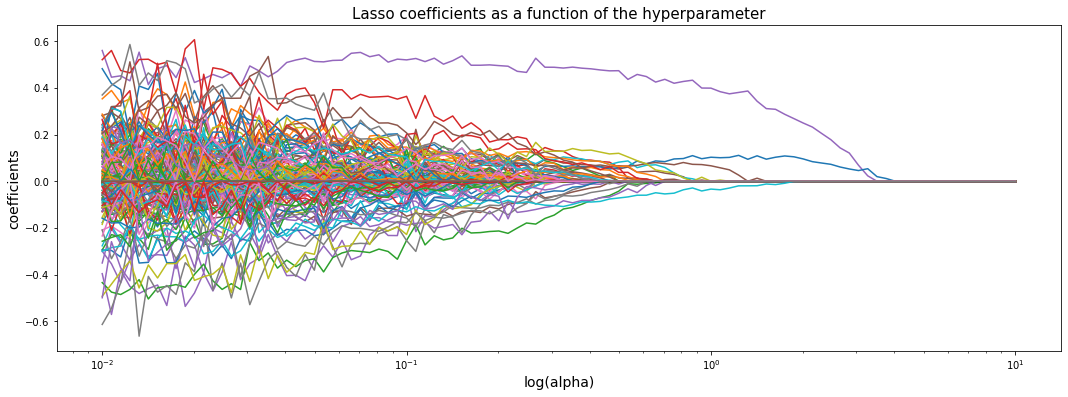

In [25]:
#create plot

plt.figure().set_size_inches(18, 6)
plt.semilogx(lambdas, Coefs) 
plt.xlabel('log(alpha)',fontsize=14)
plt.ylabel('coefficients',fontsize=14)
plt.title('Lasso coefficients as a function of the hyperparameter',fontsize=15)
plt.axis('tight')
plt.show()

The following step was to look at the bias and variance of the model. This was supposed to be done by repeating the optimalization of the model by using bootstrap. Unfortunatly this did not work and we couldn't fit the model using bootstrap.
The random selection went wrong when trying to select a subset of the training data it kept saying that the dimensions were different for the rest of the code so it wouldn't run. We tried to resolve this error but unfortunatly we couldn't do it in the time that was left for the project.
The following steps would have been the computation of the mean, variance and standard deviation so it could be plotted for all features with errorbars. And then we would have been able to say something about the bias and the variance of the model.
What we expected was that when the lambda increased the variance would decrease since you use less coefficients for estimation. The bias on the other hand would increase when the lambda would increase since you only take a few features into account and the error you make is getting larger.

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>

***Answer***

<br>
$L_1$ and $L_2$ regularisation (as in Elastic net) provides a compromise between Rigde and Lasso. This penalty has the form: 

$\large\lambda\sum\limits_{j=1}^{P} (\alpha\beta_j^2 + (1 - \alpha)|\beta_j|))$

The second term of the sum encourages highly correlated features to be averaged, while the first term encourages a sparse solution in the coefficients of these averaged features. 

<br>
Adding this penalty to the loss function of logistic regression gives the function for penalized logistic regression with $L_1$ and $L_2$ regularisation

$max(\sum\limits_{i=1}^{n} (y_i - \sum\limits_{j=i}^{p}(x_{ij}\beta_j)^2)) + \lambda\sum\limits_{j=1}^{P} (\alpha\beta_j^2 + (1 - \alpha)|\beta_j|)) $



